In [ ]:
!pip install mlxtend
!pip install imbalanced-learn
!pip install itables
!pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/pr.csv')
df.shape

Mounted at /content/drive


(960, 68)

In [3]:
import numpy as np
true_b = 1
true_w = 2
N = 200
np.random.seed(42)
x = np.random.randn(N,1)
e = np.random.randn(N,1) * .5
y = true_b + true_w * x + e
y.shape , x.shape

((200, 1), (200, 1))

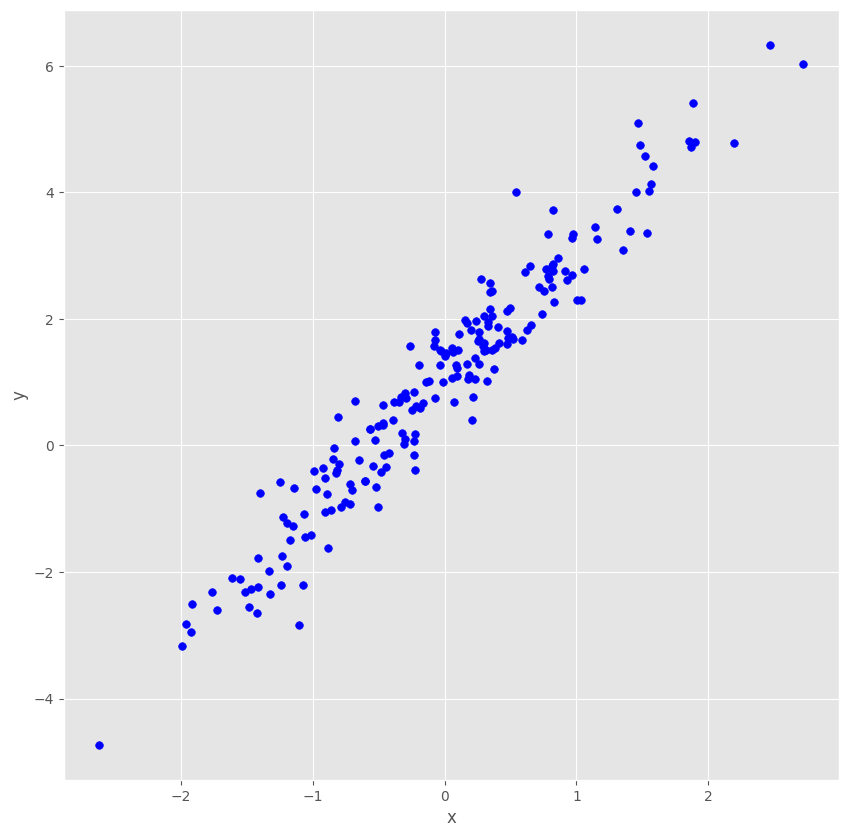

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

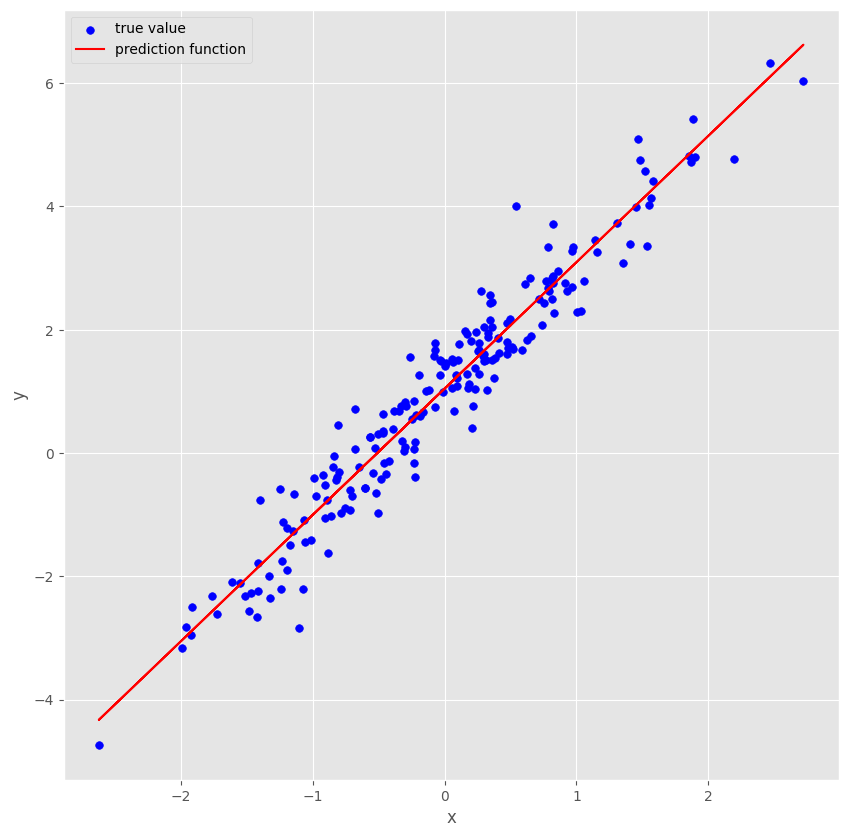

In [6]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.plot(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
lr.score(x,y)

0.9378868419873188

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y,y_pred)

0.24013265560114086

In [9]:
mean_absolute_error(y, y_pred)

0.38848925224046454

In [10]:
true_b = 1
true_w1 = 20
true_w2 = 10
N = 200
np.random.seed(20)
x = np.random.randn(N,1)
e = np.random.randn(N,1) * 1.5
y = true_b + true_w1 * x**2 + true_w2 * x  + e
y.shape, x.shape

((200, 1), (200, 1))

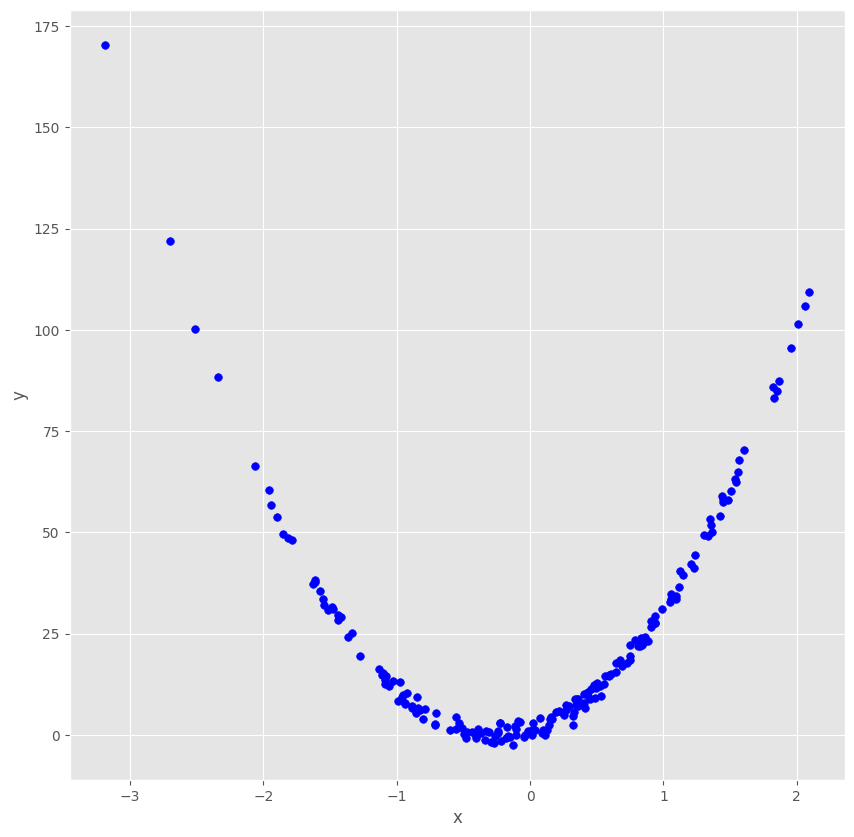

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

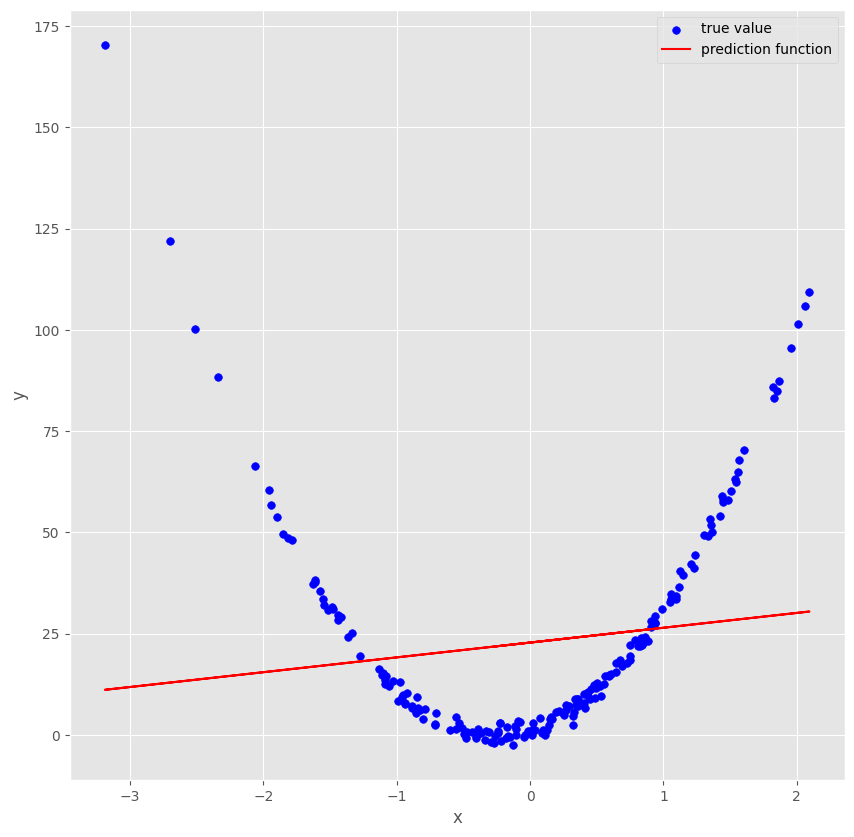

In [13]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.plot(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
mean_squared_error(y,y_pred)

754.6514754607301

In [15]:
lr.score(x,y)

0.01879115397826714

In [16]:
mean_absolute_error(y,y_pred)

20.288472542225755

In [17]:
lr.coef_, lr.intercept_

(array([[3.65774105]]), array([22.79257539]))

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 7, random_state= 2)
dt.fit(x,y)
y_pred = dt.predict(x)

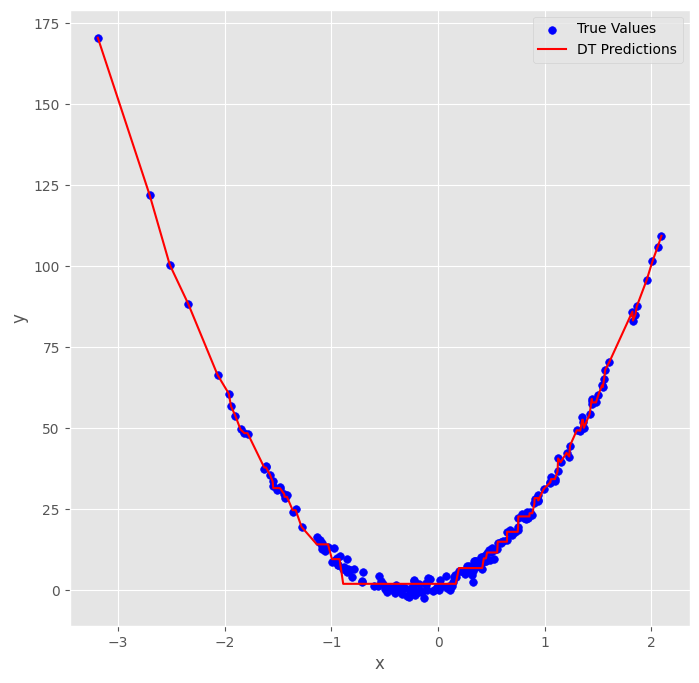

In [19]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')

# Scatter plot of the original data
plt.scatter(x, y, s=30, c='b', label='True Values')

# Plot the DT predictions as a line plot using the real x values
sorted_indices = np.argsort(x.flatten())  # Sort indices for smooth line plot
plt.plot(x[sorted_indices], y_pred[sorted_indices], color="red", label="DT Predictions")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

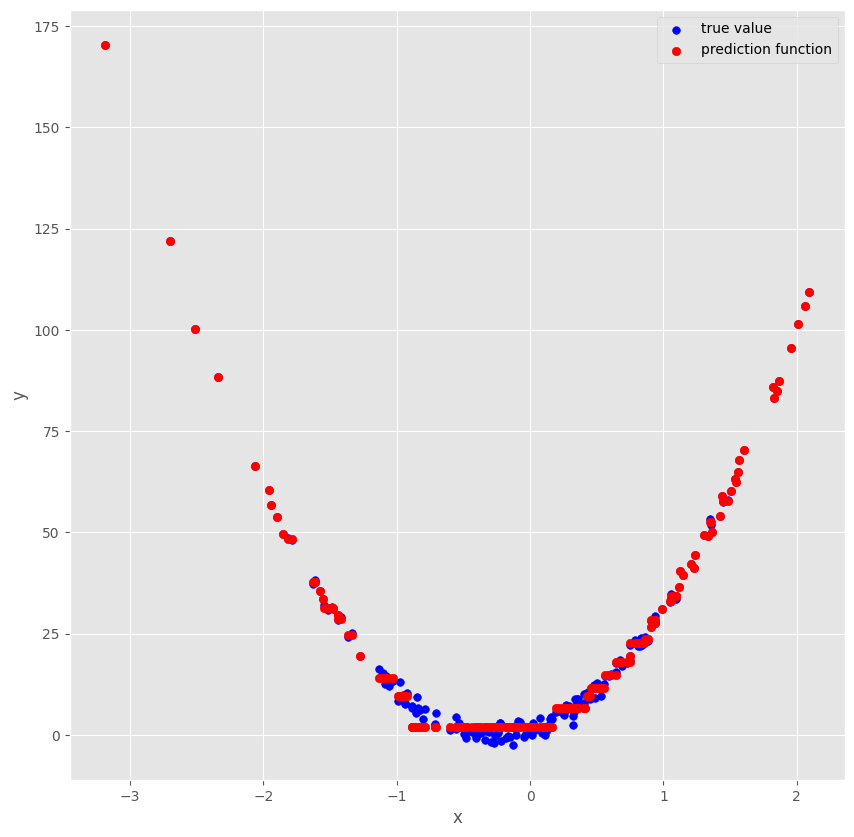

In [20]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.scatter(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
mean_squared_error(y,y_pred)

2.6186976639781445

In [22]:
dt.score(x,y)

0.9965951311346962

In [23]:
mean_absolute_error(y,y_pred)

1.0475360888183334

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(2)
knn.fit(x,y)
y_pred = knn.predict(x)

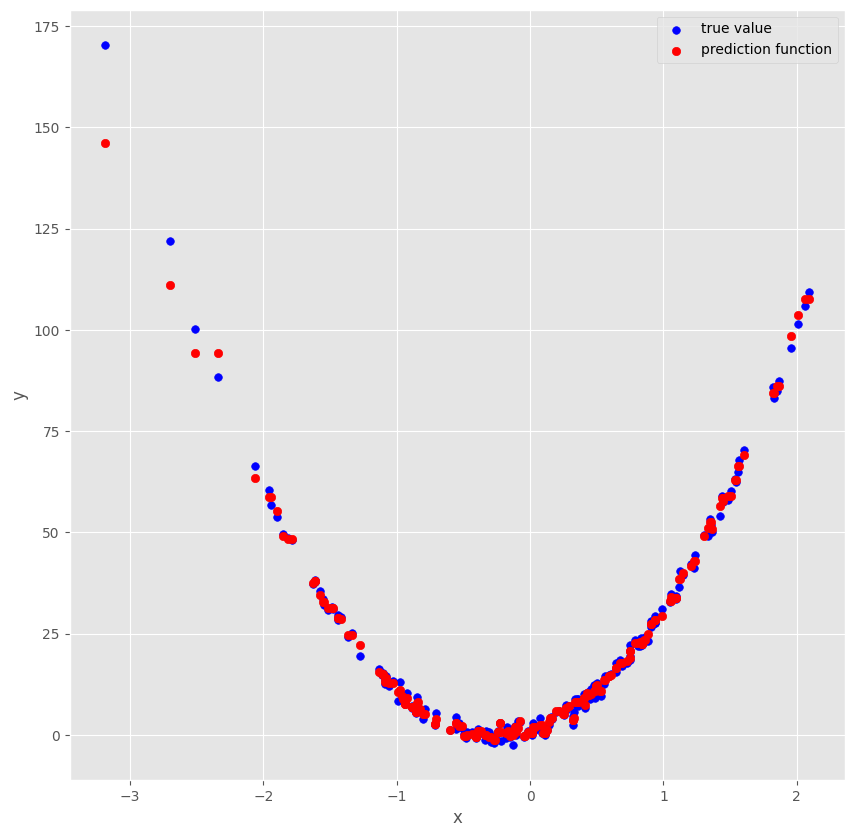

In [25]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.scatter(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

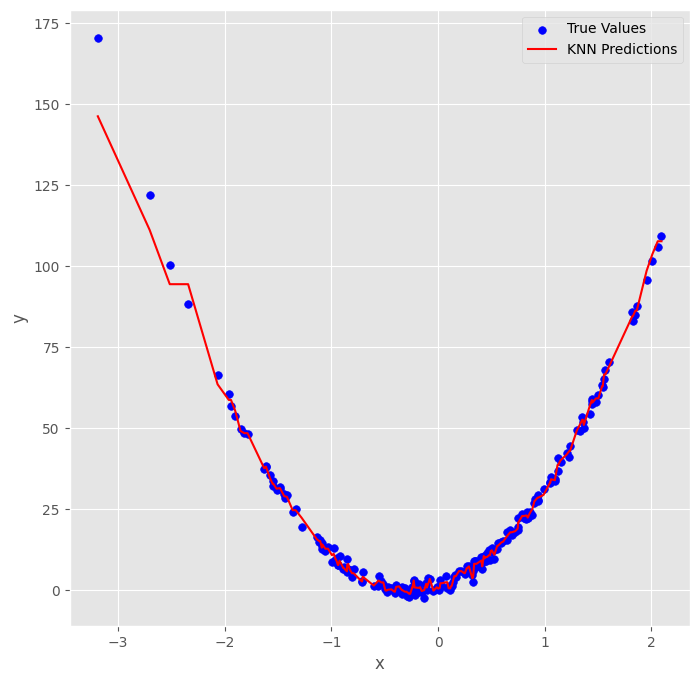

In [26]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')

# Scatter plot of the original data
plt.scatter(x, y, s=30, c='b', label='True Values')

# Plot the KNN predictions as a line plot using the real x values
sorted_indices = np.argsort(x.flatten())  # Sort indices for smooth line plot
plt.plot(x[sorted_indices], y_pred[sorted_indices], color="red", label="KNN Predictions")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
x[0],y[0],y_pred[0]

(array([0.88389311]), array([23.20830508]), array([24.92871456]))

In [28]:
knn.score(x,y)

0.9935818060308759

In [29]:
from sklearn.svm import SVR
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(x, y)
y_pred = svm_rbf.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


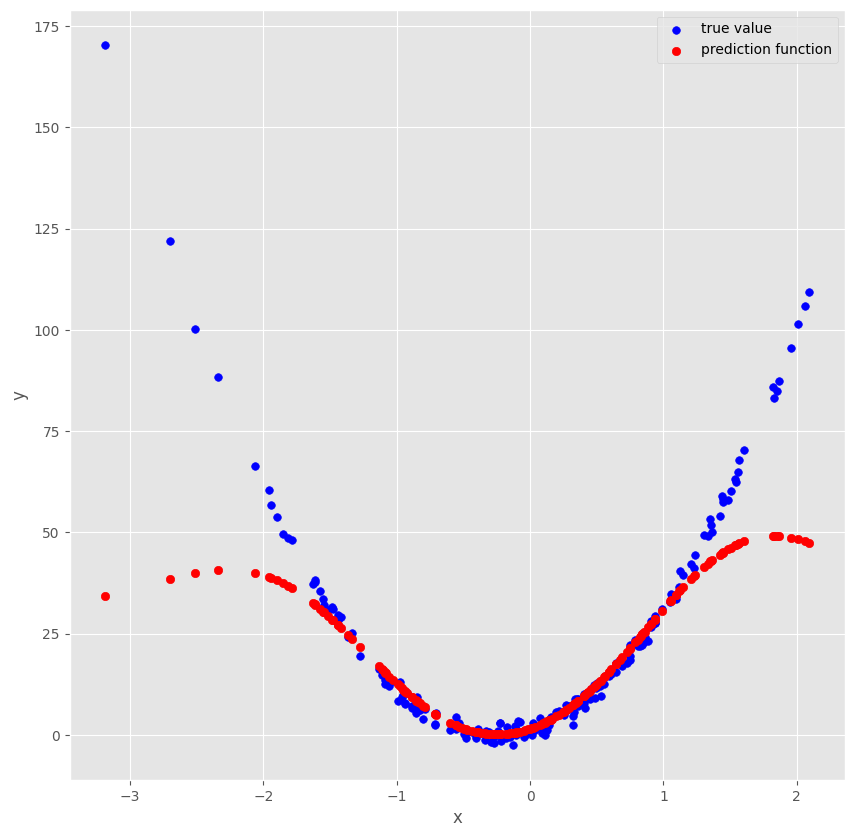

In [30]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.scatter(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

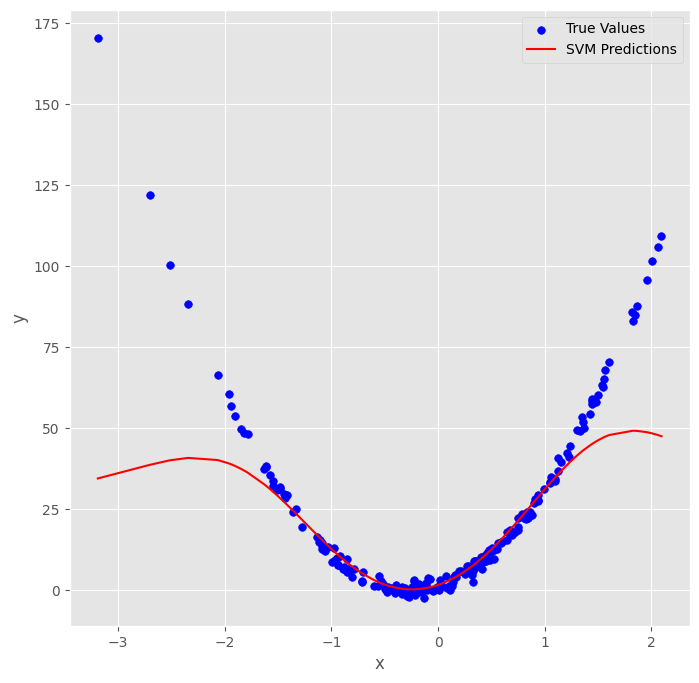

In [31]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')

# Scatter plot of the original data
plt.scatter(x, y, s=30, c='b', label='True Values')

# Plot the SVM predictions as a line plot using the real x values
sorted_indices = np.argsort(x.flatten())  # Sort indices for smooth line plot
plt.plot(x[sorted_indices], y_pred[sorted_indices], color="red", label="SVM Predictions")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
svm_rbf.score(x,y)

0.6442922604272174

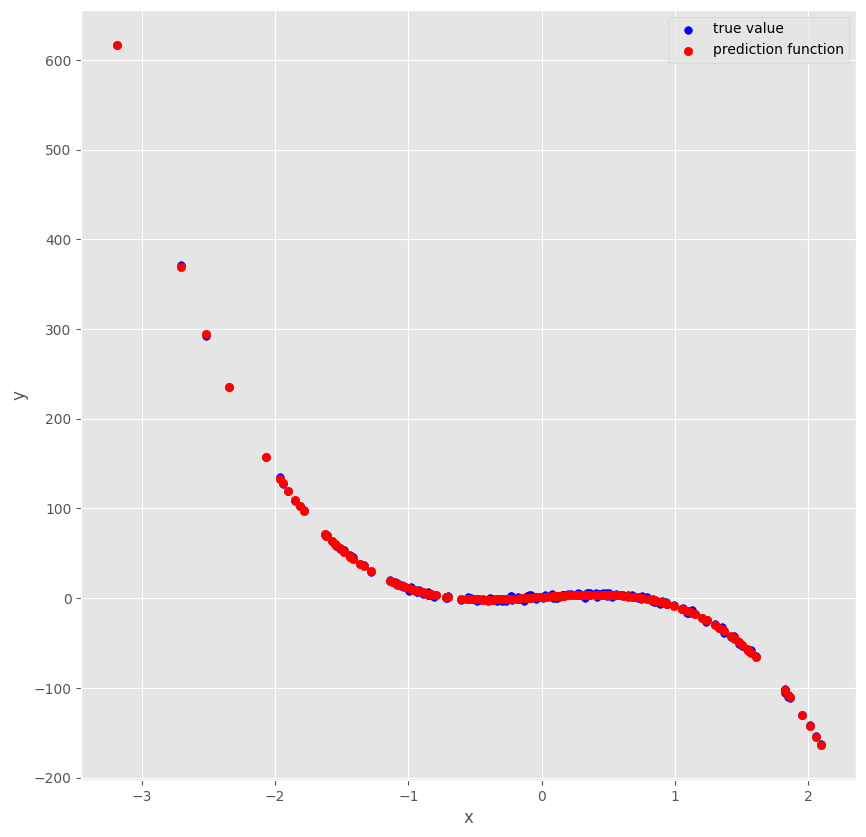

In [33]:
from sklearn.preprocessing import PolynomialFeatures
true_b = 1
true_w1 = -20
true_w2 = 10
N = 200
np.random.seed(20)
x = np.random.randn(N,1)
e = np.random.randn(N,1) * 1.5
y = true_b + true_w1 * x**3 + true_w2 * x  + e
reg = PolynomialFeatures(degree=4)
x_reg = reg.fit_transform(x)
lr = LinearRegression()
lr.fit(x_reg,y)
y_pred = lr.predict(x_reg)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(x,y,s=30, c = 'b', label = 'true value')
plt.scatter(x,y_pred, c = 'r', label = 'prediction function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [34]:
x_reg.shape

(200, 5)

In [35]:
lr.score(x_reg,y)

0.9995991450268655

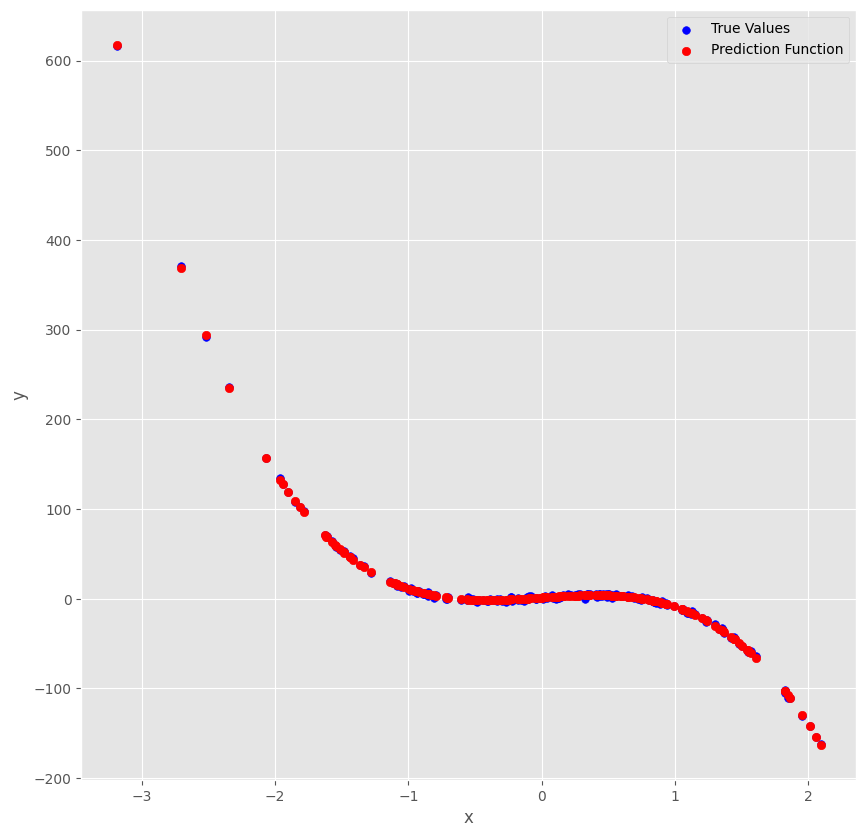

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Generate the data
true_b = 1
true_w1 = -20
true_w2 = 10
N = 200

np.random.seed(20)
x = np.random.randn(N, 1)
e = np.random.randn(N, 1) * 1.5
y = true_b + true_w1 * x**3 + true_w2 * x + e

# Create a pipeline with polynomial features and linear regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # Step 1: Polynomial transformation
    ('linear', LinearRegression())           # Step 2: Linear regression model
])

# Fit the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the true values and the predictions
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')

plt.scatter(x, y, s=30, c='b', label='True Values')  # True values
plt.scatter(x, y_pred, c='r', label='Prediction Function')  # Predictions

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [37]:
lr.score(x_reg,y)

0.9995991450268655

In [38]:
df = pd.read_csv(f'{data_path}/pr.csv')
df.shape

(960, 68)

In [39]:
df

Unnamed: 0  num_floor  unit_per_floor         price  age  statuse  view  \
0             0          5               2  1.168224e+08    0      3.0     7   
1             1          6               2  1.350000e+08    0      3.0     7   
2             2          4               2  1.589820e+08    0      3.0     7   
3             3          4               1  3.937500e+07   12      1.0     7   
4             4          4               2  6.206897e+07   20      3.0     7   
..          ...        ...             ...           ...  ...      ...   ...   
955         955          4               1  1.030303e+08   17      1.0     7   
956         956          5               1  1.400000e+08    0      3.0     7   
957         957          5               2  9.793814e+07   10      1.0     7   
958         958          4               2  5.428571e+07   12      1.0     7   
959         959          6               2  1.100000e+08    0      3.0     7   

     doc_status  north  sought  ...  z_شهیدعراقی  z_فرجام  z_قنات كوثر  \
0           6.0      0       1  ...        False    False        False   
1           6.0      0       1  ...        False    False        False   
2           6.0      1       0  ...         True    False        False   
3           0.0      0       1  ...        False    False        False   
4           6.0      0       1  ...        False    False        False   
..          ...    ...     ...  ...          ...      ...          ...   
955         6.0      1       0  ...        False    False        False   
956         6.0      0       1  ...        False    False        False   
957         6.0      1       0  ...        False    False        False   
958         6.0      0       1  ...        False    False        False   
959         6.0      0       0  ...        False     True        False   

     z_لویزان  z_مجیدیه  z_میدان شاهد  z_نیروی دریایی  z_هروی  z_هنگام  \
0       False     False         False           False   False    False   
1       False     False         False           False   False    False   
2       False     False         False           False   False    False   
3       False     False         False           False   False    False   
4       False     False         False           False   False    False   
..        ...       ...           ...             ...     ...      ...   
955     False     False         False           False   False    False   
956     False     False         False           False   False    False   
957     False     False         False           False   False    False   
958     False     False         False           False   False    False   
959     False     False         False           False   False    False   

     z_پروین  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
955    False  
956    False  
957    False  
958     True  
959    False  

[960 rows x 68 columns]

In [40]:
df.columns.values

array(['Unnamed: 0', 'num_floor', 'unit_per_floor', 'price', 'age',
       'statuse', 'view', 'doc_status', 'north', 'sought', 'west', 'east',
       'floor', 'area', 'num_sleep', 'tel', 'kitch', 'service',
       'floor_covering', 'open', 'parking', 'warehouse', 'balcony',
       'Fireplace', 'Chiller', 'Gas', 'Patio', 'Pool', 'Package',
       'Elevator', 'Cooler', 'User', 'Fan coil', 'Basement', 'Jacuzzi',
       'Secluded yard', 'Sauna', 'Yard', 'z_اتوبان بابایی', 'z_استخر',
       'z_ایت', 'z_بزرگراه بابائی شهرك بهشتی',
       'z_بزرگراه بابائی شهرك شهپریان', 'z_بنی هاشم',
       'z_تهرانبارس خ محمدخانی', 'z_تهرانپارس', 'z_جشنواره', 'z_حكیمیه',
       'z_خواجه عبدالله', 'z_دلاوران', 'z_دماوند', 'z_رسالت', 'z_سراج',
       'z_شریعتی', 'z_شمس آّباد', 'z_شمیران نو',
       'z_شهرك راه آهن بلواركوهك', 'z_شهید عراقی', 'z_شهیدعراقی',
       'z_فرجام', 'z_قنات كوثر', 'z_لویزان', 'z_مجیدیه', 'z_میدان شاهد',
       'z_نیروی دریایی', 'z_هروی', 'z_هنگام', 'z_پروین'], dtype=object)

In [41]:
df = df.drop(['Unnamed: 0'], axis=1)

In [42]:
nan_counts = df.isna().sum()
# Filter columns where the NaN count is not zero
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
['doc_status']


In [43]:
df[df['doc_status'].isna()].index

Index([351], dtype='int64')

In [44]:
# df = df.drop(index = 351, axis=1)
nan_indices = df[df['doc_status'].isna()].index
df = df.drop(nan_indices)

In [45]:
df[df['doc_status'].isna()]

Empty DataFrame
Columns: [num_floor, unit_per_floor, price, age, statuse, view, doc_status, north, sought, west, east, floor, area, num_sleep, tel, kitch, service, floor_covering, open, parking, warehouse, balcony, Fireplace, Chiller, Gas, Patio, Pool, Package, Elevator, Cooler, User, Fan coil, Basement, Jacuzzi, Secluded yard, Sauna, Yard, z_اتوبان بابایی, z_استخر, z_ایت, z_بزرگراه بابائی شهرك بهشتی, z_بزرگراه بابائی شهرك شهپریان, z_بنی هاشم, z_تهرانبارس خ محمدخانی, z_تهرانپارس, z_جشنواره, z_حكیمیه, z_خواجه عبدالله, z_دلاوران, z_دماوند, z_رسالت, z_سراج, z_شریعتی, z_شمس آّباد, z_شمیران نو, z_شهرك راه آهن بلواركوهك, z_شهید عراقی, z_شهیدعراقی, z_فرجام, z_قنات كوثر, z_لویزان, z_مجیدیه, z_میدان شاهد, z_نیروی دریایی, z_هروی, z_هنگام, z_پروین]
Index: []

[0 rows x 67 columns]

In [46]:
x = df.drop(['price'],axis=1)
y = df['price']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.1, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size= 0.2, random_state=1)

In [47]:
sc = StandardScaler()
mmy = MinMaxScaler((1,10))
mm_area = MinMaxScaler(feature_range=(1, 7))
mm_age = MinMaxScaler(feature_range=(0, 7))
x_train['area'] = mm_area.fit_transform(x_train['area'].values.reshape(-1,1))  # bar rooye dade haye train be kar miravad.
x_train['age'] = mm_age.fit_transform(x_train['age'].values.reshape(-1,1))
x_test['area'] = mm_area.transform(x_test['area'].values.reshape(-1,1))   # bar rooye dade haye test va valid be kar miravad.
x_test['age'] = mm_age.transform(x_test['age'].values.reshape(-1,1))
x_valid['area'] = mm_area.transform(x_valid['area'].values.reshape(-1,1))
x_valid['age'] = mm_age.transform(x_valid['age'].values.reshape(-1,1))
y_sc_train = sc.fit_transform(y_train.values.reshape(-1,1))
y_sc_test = sc.transform(y_test.values.reshape(-1,1))
y_sc_valid = sc.transform(y_valid.values.reshape(-1,1))
y_mm_train = mmy.fit_transform(y_train.values.reshape(-1,1))
y_mm_test = mmy.transform(y_test.values.reshape(-1,1))
y_mm_valid = mmy.transform(y_valid.values.reshape(-1,1))

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train,y_sc_train)
y_pred = lr.predict(x_test)
y_pred = sc.inverse_transform(y_pred)
print('r2: ',r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

r2:  -3.0254429116819816e+22
MSE:  2.6705889410727703e+37
MAE:  7.459039456072012e+17
MAPE:  9493324464.612206


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train,y_mm_train)
y_pred = lr.predict(x_test)
y_pred = mmy.inverse_transform(y_pred)
print('r2: ',r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

r2:  -3.0254429116819803e+22
MSE:  2.670588941072769e+37
MAE:  7.45903945607199e+17
MAPE:  9493324464.61219


In [50]:
y_pred = lr.predict(x_train)
y_pred = mmy.inverse_transform(y_pred)
print('r2: ',r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))


r2:  0.7747547846715902
MSE:  181706250169127.8
MAE:  9980502.601466447
MAPE:  0.12632003334688263


In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
lr = SGDRegressor(random_state=1,penalty='l1')
lr.fit(x_train,y_mm_train)
y_pred = lr.predict(x_test)
y_pred = mmy.inverse_transform(y_pred.reshape(-1,1))
print('r2: ',r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

r2:  0.6991602516740649
MSE:  265554276966244.34
MAE:  11708672.802778654
MAPE:  0.13325584986678632


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred = lr.predict(x_train)
y_pred = mmy.inverse_transform(y_pred.reshape(-1,1))
print('r2: ',r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))

r2:  0.6808493728351066
MSE:  257460135686814.53
MAE:  11701873.348834839
MAPE:  0.13877860443190093


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error,
                                mean_absolute_error,
                                r2_score,
                                mean_absolute_percentage_error)
model = RandomForestRegressor(n_estimators=1000,max_depth=5,
                              max_features= .7, max_samples= .5,
                              random_state=42)
model.fit(x_train,y_mm_train)
y_pred = model.predict(x_valid)
y_pred = mmy.inverse_transform(y_pred.reshape(-1,1))
print('r2: ',r2_score(y_valid, y_pred))
print('MSE: ', mean_squared_error(y_valid, y_pred))
print('MAE: ', mean_absolute_error(y_valid, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_valid, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r2:  0.6634702348116386
MSE:  303033070435664.7
MAE:  13557650.440601988
MAPE:  0.15699434428386885


In [54]:
y_pred = model.predict(x_test)
y_pred = mmy.inverse_transform(y_pred.reshape(-1,1))
print('r2: ',r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

r2:  0.6809513143080144
MSE:  281627489443893.25
MAE:  12028978.94721675
MAPE:  0.1410116145268211


In [55]:
y_pred = model.predict(x_train)
y_pred = mmy.inverse_transform(y_pred.reshape(-1,1))
print('r2: ',r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', (mean_squared_error(y_train, y_pred))**.5)
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))

r2:  0.7343544289070533
MSE:  214297384861021.1
RMSE:  14638899.714835849
MAE:  11123717.484876228
MAPE:  0.13587259602143778


In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

model = XGBRegressor(n_estimators=150, max_depth=2,
                     learning_rate=0.1, subsample=0.5,
                     colsample_bytree=0.7, random_state=42)

model.fit(x_train, y_mm_train)

y_pred = model.predict(x_test)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('Test Metrics')
print('R2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

print('##################################################################')

y_pred = model.predict(x_train)
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('Train Metrics')
print('R2: ', r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))


Test Metrics
R2:  0.7657283248155556
MSE:  206793968095846.66
MAE:  10533462.365604699
MAPE:  0.12220489514791673
##################################################################
Train Metrics
R2:  0.8120426551053819
MSE:  151625970313069.97
MAE:  9151789.703866998
MAPE:  0.11420816143621641


In [57]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

xgb_model = XGBRegressor(n_estimators=1000, max_depth=5,
                         learning_rate=0.1, subsample=0.5,
                         colsample_bytree=0.7, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, max_depth=5,
                                 max_features=0.7, max_samples=0.5,
                                 random_state=42)

sgd_model = SGDRegressor(random_state=42, penalty='l1')

svr_model = SVR(kernel='rbf')

voting_regressor = VotingRegressor(
    estimators=[('xgb', xgb_model), ('rf', rf_model),
                ('sgd', sgd_model), ('svr', svr_model)]
)

voting_regressor.fit(x_train, y_mm_train)

y_pred = voting_regressor.predict(x_test)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('R2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

print('#####################################################################')
y_pred = voting_regressor.predict(x_train)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('R2: ', r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2:  0.7360717546124689
MSE:  232972121419678.78
MAE:  11189288.846188694
MAPE:  0.13181225457391993
#####################################################################
R2:  0.8439971253754687
MSE:  125848166507325.75
MAE:  8311200.440166725
MAPE:  0.10181492295261489


In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error)
from sklearn.decomposition import PCA

# Apply Polynomial Features to training data
reg = PolynomialFeatures(degree=2)  # Adjust the degree as necessary
x_reg_train = reg.fit_transform(x_train)

# Optional: Reduce dimensions using PCA on training data
pca = PCA(n_components=100,random_state=2)  # Adjust the number of components as necessary
x_reg_train_pca = pca.fit_transform(x_reg_train)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(x_reg_train_pca, y_mm_train)


x_reg_test = reg.transform(x_test)  # Use transform instead of fit_transform
x_reg_test_pca = pca.transform(x_reg_test)  # Reduce dimensions with PCA

# Make predictions
y_pred = lr.predict(x_reg_test_pca)
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('Test Metrics')
print('R2 : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))



y_train_pred = lr.predict(x_reg_train_pca)
y_train_pred = mmy.inverse_transform(y_train_pred.reshape(-1, 1))

print('Train Metrics')
print('R2 : ', r2_score(y_train, y_train_pred))
print('MSE : ', mean_squared_error(y_train, y_train_pred))
print('MAE : ', mean_absolute_error(y_train, y_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, y_train_pred))




Test Metrics
R2 :  0.7761265810375457
MSE :  197615322560787.0
MAE :  10736839.243040614
MAPE :  0.1318165389937234
Train Metrics
R2 :  0.7975754384738194
MSE :  163296734021292.8
MAE :  9399678.993652841
MAPE :  0.11886186869757473


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

# Define the parameter grids for each model
xgb_param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

rf_param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'max_features': [0.5, 0.7, 1.0],
    'max_samples': [0.5, 0.7, 1.0]
}

sgd_param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}

svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize the base models with RandomizedSearchCV
xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_param_grid, n_iter=10, cv=3, random_state=42)
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, n_iter=10, cv=3, random_state=42)
sgd_search = RandomizedSearchCV(SGDRegressor(random_state=42), sgd_param_grid, n_iter=10, cv=3, random_state=42)
svr_search = RandomizedSearchCV(SVR(kernel='rbf'), svr_param_grid, n_iter=10, cv=3, random_state=42)

# Fit the RandomizedSearchCV for each model
xgb_search.fit(x_train, y_mm_train.ravel())
rf_search.fit(x_train, y_mm_train.ravel())
sgd_search.fit(x_train, y_mm_train.ravel())
svr_search.fit(x_train, y_mm_train.ravel())

# Get the best models from the search
xgb_best = xgb_search.best_estimator_
rf_best = rf_search.best_estimator_
sgd_best = sgd_search.best_estimator_
svr_best = svr_search.best_estimator_

# Create the VotingRegressor with the optimized models
voting_regressor = VotingRegressor(
    estimators=[('xgb', xgb_best), ('rf', rf_best),
                ('sgd', sgd_best), ('svr', svr_best)]
)

# Fit the VotingRegressor on the training data
voting_regressor.fit(x_train, y_mm_train.ravel())

# Predict on the test set
y_pred = voting_regressor.predict(x_test)

# Inverse transform the predictions to get them back to the original scale
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

# Calculate and print metrics

print('Test Metrics')
print('R2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

print('##########################################################################')
y_pred = voting_regressor.predict(x_valid)

# Inverse transform the predictions to get them back to the original scale
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

# Calculate and print metrics

print('Valid Metrics')
print('R2: ', r2_score(y_valid, y_pred))
print('MSE: ', mean_squared_error(y_valid, y_pred))
print('MAE: ', mean_absolute_error(y_valid, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_valid, y_pred))

print('###################################################################################')

y_pred = voting_regressor.predict(x_train)

# Inverse transform the predictions to get them back to the original scale
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

# Calculate and print metrics

print('Train Metrics')
print('R2: ', r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_pred))

Test Metrics
R2:  0.7663285077204178
MSE:  206264180598565.9
MAE:  10457108.937351892
MAPE:  0.1210774750223838
##########################################################################
Valid Metrics
R2:  0.764307167049986
MSE:  212233003545901.56
MAE:  11056056.518490313
MAPE:  0.12742230387277365
###################################################################################
Train Metrics
R2:  0.8415979312915419
MSE:  127783606333573.22
MAE:  8121570.320306626
MAPE:  0.09937050393882767
